In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import copy
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

import world_model
import planning_cases

sns.set(style="whitegrid")
sns.set_context(context="paper")

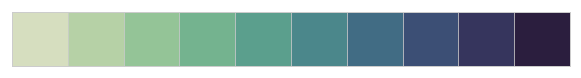

In [2]:
sns.palplot(sns.cubehelix_palette(10, start=.5, rot=-.75))

In [3]:
wm = world_model.WorldModelWrapper()
wm.load_model()

Instructions for updating:
Colocations handled automatically by placer.


current adaptation_rate: 0.05
current adaptation_rate: 0.1
current adaptation_rate: 0.175
current adaptation_rate: 0.25
current adaptation_rate: 0.5
current adaptation_rate: 1
current adaptation_rate: 1.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 6 columns):
adaptation_rate    35000 non-null float64
iteration          35000 non-null float64
loss               35000 non-null float64
loss_nr            35000 non-null float64
grad               35000 non-null float64
action_nr          35000 non-null float64
dtypes: float64(6)
memory usage: 1.6 MB
None
       adaptation_rate     iteration          loss  loss_nr          grad  \
count     35000.000000  35000.000000  35000.000000  35000.0  35000.000000   
mean          0.510714    249.500000     23.263034      0.0      0.057502   
std           0.504249    144.339341     17.467881      0.0      0.467610   
min           0.050000      0.000000      5.898798      0.0     -4.052314   
25%  

,adaptation_rate,iteration,loss,loss_nr,grad,action_nr
0,0.05,0.0,54.089542,0.0,0.167627,0.0
1,0.05,0.0,54.089542,0.0,0.487549,1.0
2,0.05,0.0,54.089542,0.0,0.289815,2.0
3,0.05,0.0,54.089542,0.0,0.352041,3.0
4,0.05,0.0,54.089542,0.0,0.377801,4.0


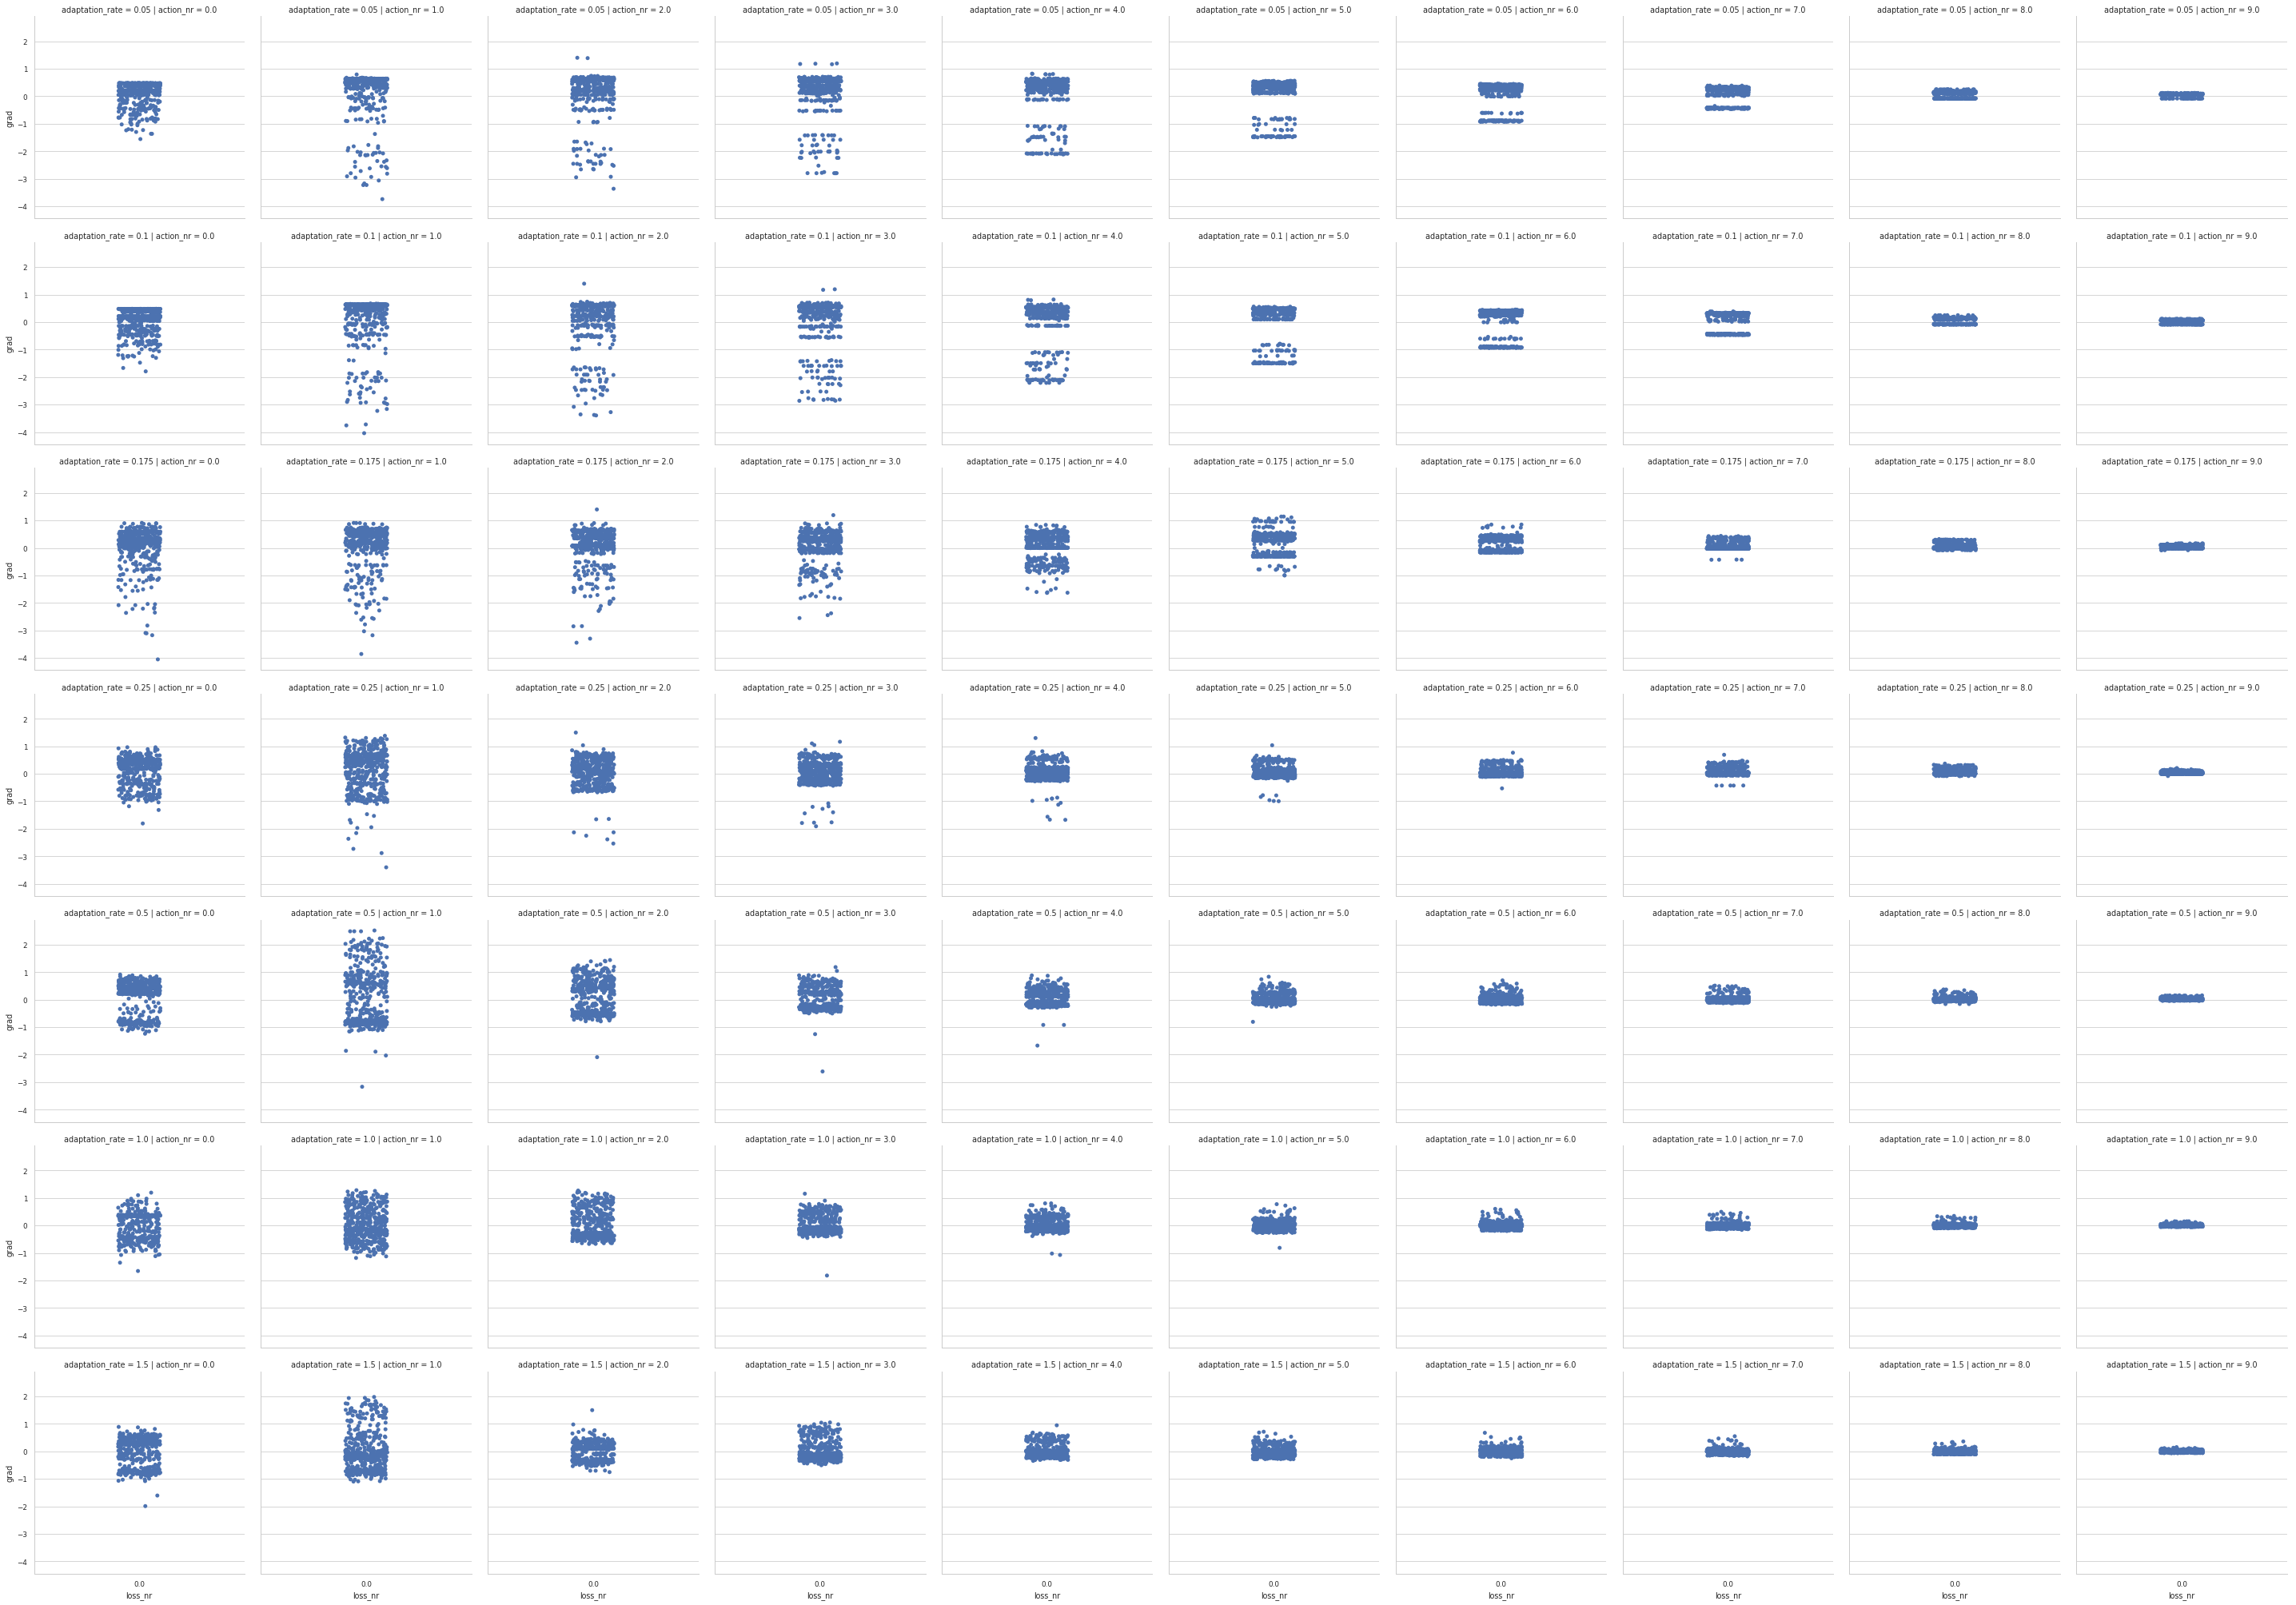

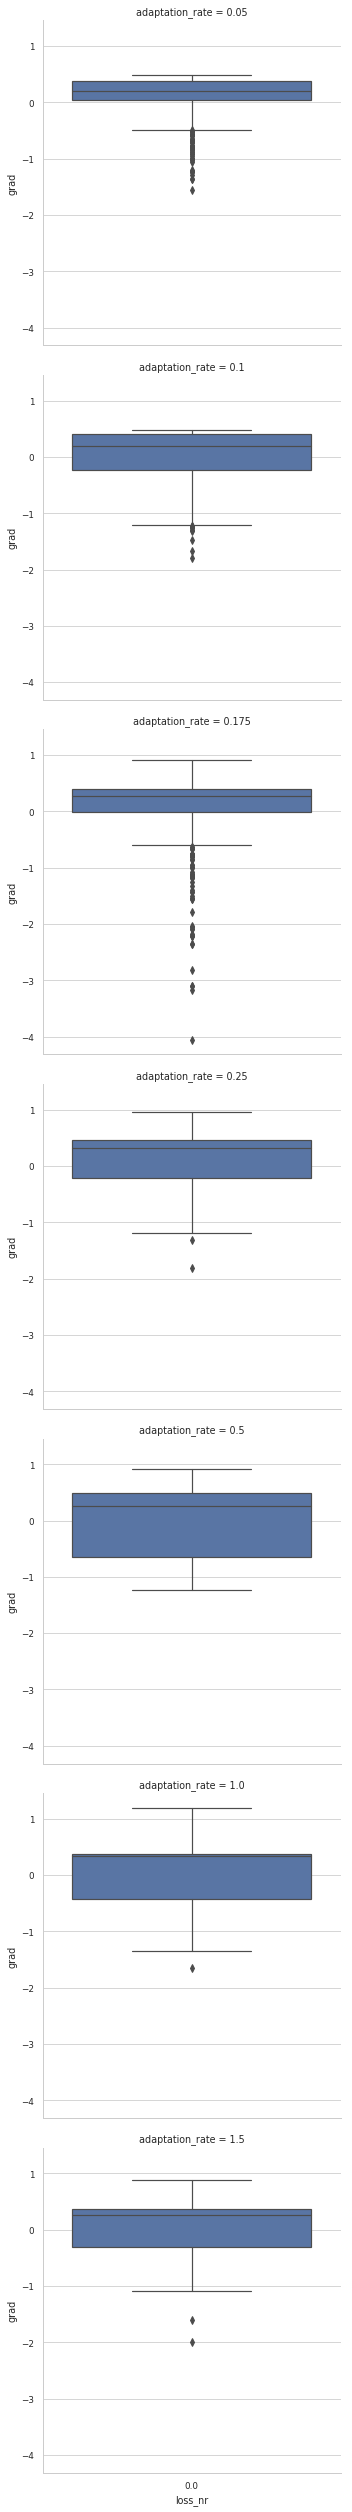

In [24]:
#adaptation_rates = [2, 3, 4, 5]
adaptation_rates = [0.05, 0.1, 0.175, 0.25, 0.5, 1, 1.5]
#adaptation_rates = [1]
#df, _ = planning_cases.plan_convergence(wmr=wm, plan_iterations=100, adaptation_rates=adaptation_rates, plan_length=4, visualize=False)
df, _ = planning_cases.plan_convergence(wmr=wm, plan_iterations=500, adaptation_rates=adaptation_rates, plan_length=10, visualize=True)
print(df.info())
print(df.describe())
df.head()

In [25]:
# calc df with absolut grads
df_abs = df.copy(deep=True)
df_abs["grad"] = df_abs["grad"].apply(lambda x: np.absolute(x))
df_abs["grad"].describe()

# get effects on the next action
df_a0 = df[df["action_nr"] == 0]
df_a0_abs = df_abs[df_abs["action_nr"] == 0]

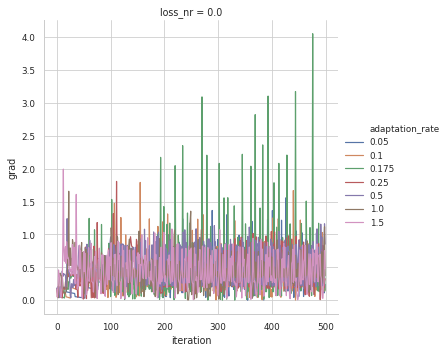

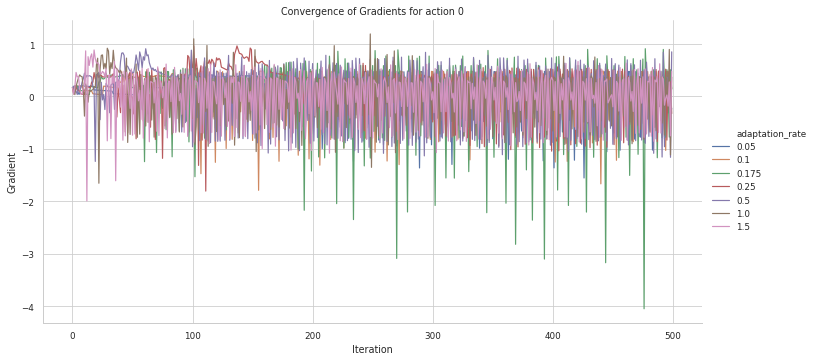

In [26]:
# effect of gradients over time
# adaptation rate - convergence plot for a0
# overview
sns.relplot(x="iteration",
            y="grad",
            hue="adaptation_rate",
            palette=sns.color_palette(n_colors=len(df["adaptation_rate"].unique()), desat=0.8),
            #linewidth=1,
            #row="adaptation_rate",
            col="loss_nr",
            kind="line", data=df_a0_abs)

# adaptation rate - convergence plot for a0
# all grad causes in one plot
grad_plot = sns.relplot(
    x="iteration",
    y="grad",
    hue="adaptation_rate",
    palette=sns.color_palette(n_colors=len(df["adaptation_rate"].unique()), desat=0.8),
    #palette=sns.color_palette(palette="Blues", n_colors=10, desat=0.8),
    #linewidth=1,
    #height=7,
    aspect=2,
    #row="adaptation_rate",
    kind="line",
    data=df_a0
).set(title=r"Convergence of Gradients for action 0", xlabel=r"Iteration",ylabel=r"Gradient")
grad_plot.fig.savefig("graphics/grad_convergence_a0.svg")

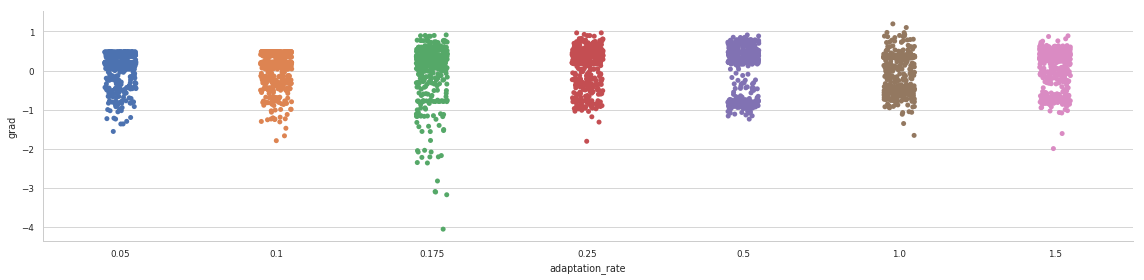

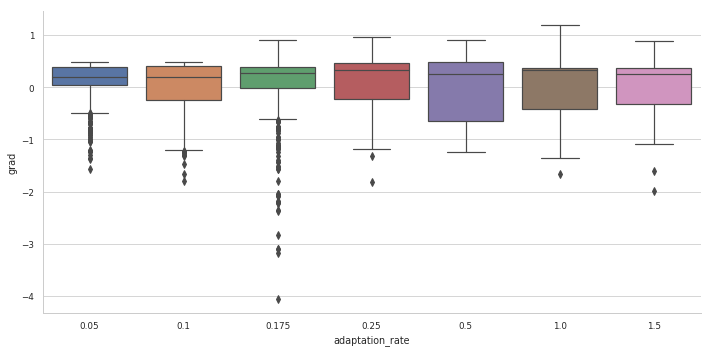

In [27]:
# gradients for the actions aggregated
# adaption rate - convergence plot for a0 again, but with catplot
g1 = sns.catplot(x="adaptation_rate",
            y="grad",
            #row="adaptation_rate",
            height=4,
            aspect=4,
            data=df_a0
)

# plot influence on action 0 by loss
g2 = sns.catplot(x="adaptation_rate",
            y="grad",
            #row="adaptation_rate",
            kind="box",
            #height=4,
            aspect=2,
            data=df_a0
)

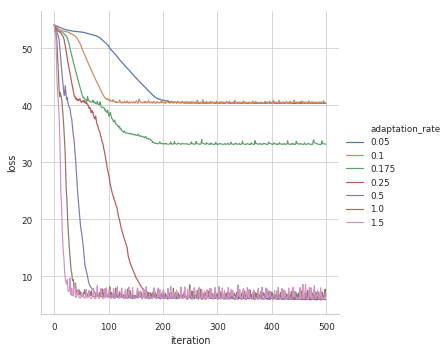

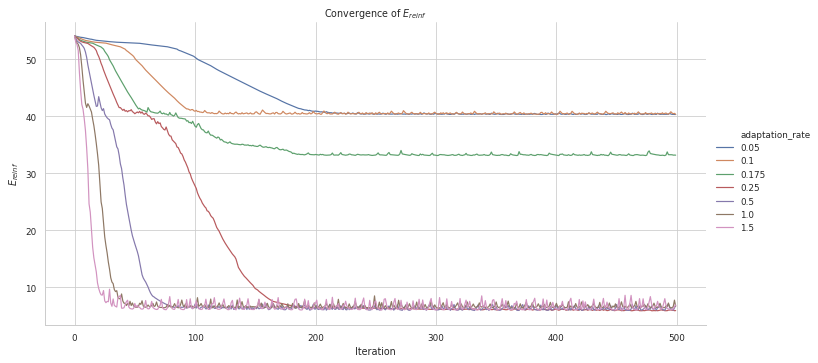

In [28]:
# Loss convergence per iteration
sns.relplot(x="iteration",
            y="loss",
            hue="adaptation_rate",
            palette=sns.color_palette(n_colors=len(df["adaptation_rate"].unique()), desat=0.8),
            kind="line", data=df_a0_abs)

# adaptation rate - convergence plot for a0
# all grad causes in one plot
ereinf_plot = sns.relplot(
    x="iteration",
    y="loss",
    hue="adaptation_rate",
    palette=sns.color_palette(n_colors=len(df["adaptation_rate"].unique()), desat=0.8),
    #height=7,
    aspect=2,
    kind="line",
    data=df_a0
).set(title=r"Convergence of $E_{reinf}$", xlabel=r"Iteration",ylabel=r"$E_{reinf}$")
ereinf_plot.fig.savefig("graphics/ereinf_convergence_a0.svg")

In [82]:
# OG Version
# effect of gradients over time
# adaptation rate - convergence plot for a0
# overview
#sns.relplot(x="iteration",
#            y="grad",
#            #hue="loss_nr",
#            #palette=sns.color_palette(palette="Blues", n_colors=10, desat=0.8),
#            linewidth=1,
#            row="adaptation_rate",
#            col="loss_nr",
#            kind="line", data=df_a0_abs)

# adaptation rate - convergence plot for a0
# all grad causes in one plot
df_iteration = df_a0.copy()
df_iteration["Reinforcement"] = df_iteration["loss_nr"]


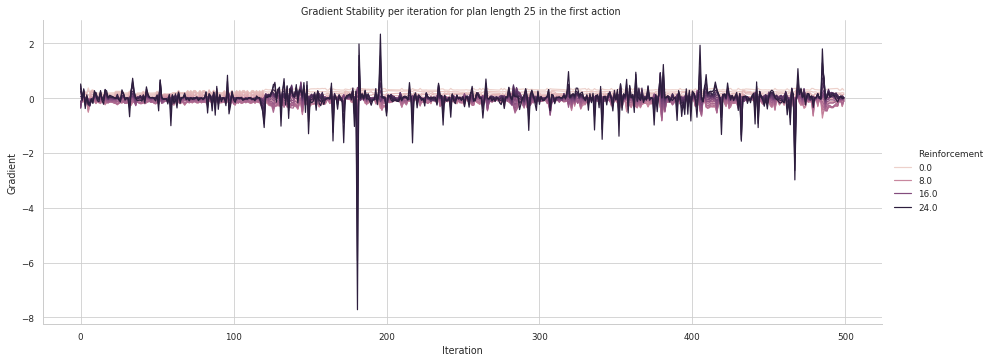

In [83]:
s_1 = sns.relplot(x="iteration",
            y="grad",
            hue="Reinforcement",
            #palette=sns.color_palette(palette="Blues", n_colors=10, desat=0.8),
            #linewidth=1,
            #height=7,
            aspect=2.5,
            #row="adaptation_rate",
            kind="line",
            data=df_iteration
)
s_1.set(title="Gradient Stability per iteration for plan length 25 in the first action ", xlabel="Iteration", ylabel="Gradient")
s_1.fig.savefig("gradient_stability_iteration_25.svg")

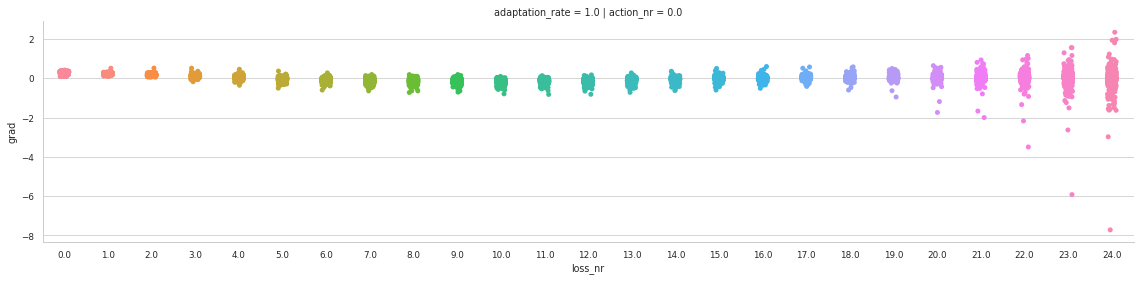

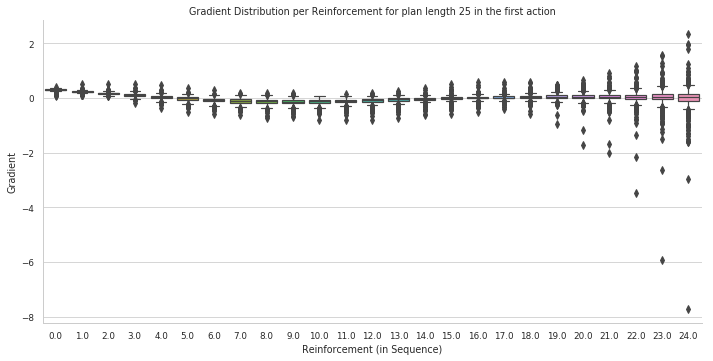

In [73]:
# OG Version
# gradients for the actions aggregated
# adaption rate - convergence plot for a0 again, but with catplot
g1 = sns.catplot(x="loss_nr",
            y="grad",
            row="adaptation_rate",
            col="action_nr",
            height=4,
            aspect=4,
            data=df_a0
)

# plot influence on action 0 by loss
g2 = sns.catplot(x="loss_nr",
            y="grad",
            #row="adaptation_rate",
            #col="action_nr",
            kind="box",
            #height=4,
            aspect=2,
            data=df_a0
)
g2.set(title="Gradient Distribution per Reinforcement for plan length 25 in the first action", xlabel="Reinforcement (in Sequence)", ylabel="Gradient")
g2.fig.savefig("gradient_stability_distribution_25.svg")

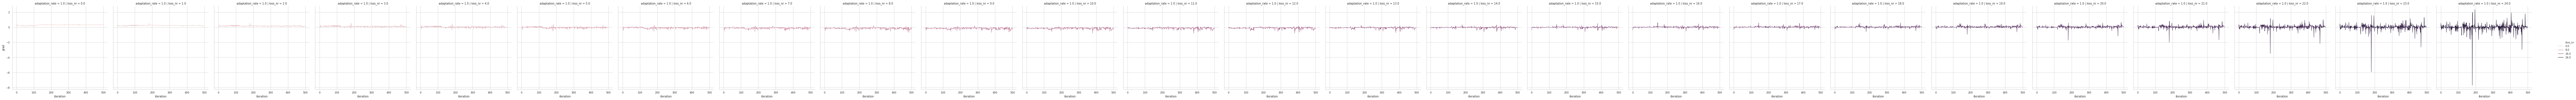

In [74]:
# adaptation rate - convergence plot for a0
# seperate columns
sns.relplot(x="iteration",
            y="grad",
            hue="loss_nr",
            #palette=sns.color_palette(palette="Blues", n_colors=10, desat=0.8),
            linewidth=1,
            row="adaptation_rate",
            col="loss_nr",
            kind="line", data=df_a0)

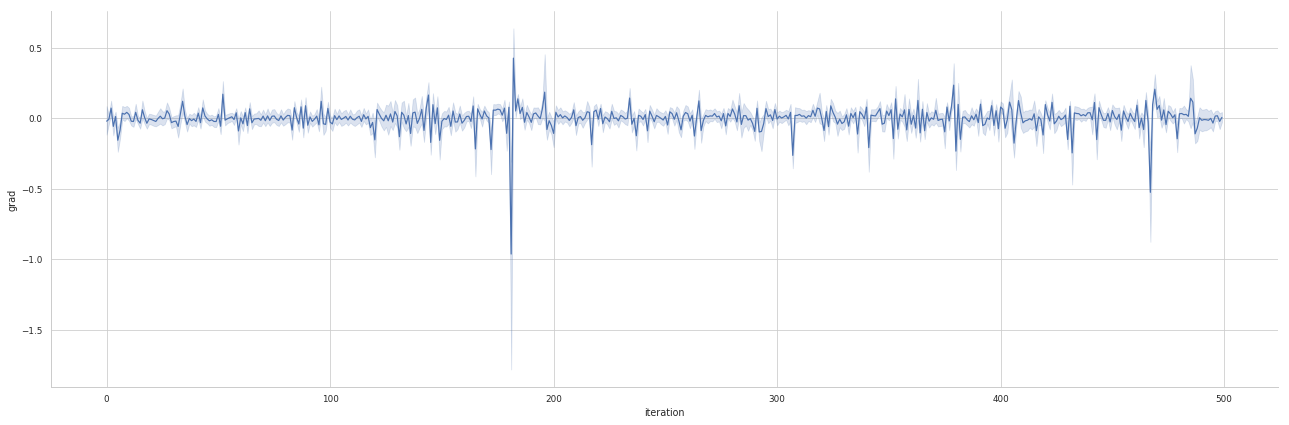

In [75]:
sns.relplot(x="iteration",
            y="grad",
            kind="line",
            height=6,
            aspect=3,
            #ci=95,
            data=df_a0
           )

In [76]:
df_a0

,adaptation_rate,iteration,loss,loss_nr,grad,action_nr
0,1.0,0.0,4.866250,0.0,0.242313,0.0
1,1.0,0.0,5.774955,1.0,0.232980,0.0
3,1.0,0.0,6.823415,2.0,0.197620,0.0
6,1.0,0.0,7.294768,3.0,0.136654,0.0
10,1.0,0.0,7.139503,4.0,0.063201,0.0
15,1.0,0.0,6.388710,5.0,-0.008964,0.0
21,1.0,0.0,5.355189,6.0,-0.103232,0.0
28,1.0,0.0,4.293877,7.0,-0.177393,0.0
36,1.0,0.0,3.141737,8.0,-0.221127,0.0
45,1.0,0.0,2.141560,9.0,-0.233459,0.0


In [70]:
df.isna().sum()

adaptation_rate    0
iteration          0
loss               0
loss_nr            0
grad               0
action_nr          0
dtype: int64